Лабораторная работа № 6: **Catboost** <br>
Выполнил: **Стадников Александр, гр.6135**

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)

import numpy as np

import matplotlib.pyplot as plt 
import seaborn as sns 
sns.set_style("darkgrid")

import warnings
import sys  
if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [2]:
import catboost
from catboost import *

# Загрузка датасета

**Исходные данные:** http://archive.ics.uci.edu/ml/datasets/Automobile

**Набор данных:** Набор данных об автомобилях

Этот набор данных состоит из трех типов объектов: (а) спецификация автомобиля с точки зрения различных характеристик, (б) присвоенный ему рейтинг страхового риска, (в) его нормализованные потери при использовании по сравнению с другими автомобилями. Второй рейтинг соответствует тому, насколько автомобиль более рискован, чем указывает его цена. Автомобилям изначально присваивается символ фактора риска, связанный с его ценой. Затем, если это более рискованно (или менее), этот символ корректируется, перемещая его вверх (или вниз) по шкале. Актуарии называют этот процесс «символизацией». Значение +3 указывает на то, что авто рискованно, -3, что это, вероятно, довольно безопасно.

**Столбцы:**

1. **symboling:** фактор риска от -3 до +3.
2. **normalized-losses:** нормализованные потери.
3. **make:** марка автомобиля:
>alfa-romero, audi, bmw, chevrolet, dodge, honda,
isuzu, jaguar, mazda, mercedes-benz, mercury,
mitsubishi, nissan, peugot, plymouth, porsche,
renault, saab, subaru, toyota, volkswagen, volvo
4. **fuel-type:** тип топлива: дизель, газ.
5. **aspiration:** турбонаддув: std (стандартный), turbo.
6. **num-of-doors:** кол-во дверей: 2 и 4.
7. **body-style:** тип кузова: хардтоп, универсал, седан, хэтчбек, кабриолет.
8. **drive-wheels:** тип привода: 4wd (полный привод), fwd (передний), rwd (задний).
9. **engine-location:** расположение двигателя: front (спереди), rear (сзади).
10. **wheel-base:** колёсная база: от 86.6 до 120.9.
11. **length:** длина автомобиля: от 141.1 до 208.1.
12. **width:** ширина автомобиля: от 60.3 to 72.3.
13. **height:** высота автомобиля: от 47.8 to 59.8.
14. **curb-weight:** масса автомобиля: от 1488 до 4066.
15. **engine-type:** тип двигателя: dohc, dohcv, l, ohc, ohcf, ohcv, rotor.
16. **num-of-cylinders:** кол-во цилиндров двигателя: eight, five, four, six, three, twelve, two.
17. **engine-size:** размер двигателя: от 61 до 326.
18. **fuel-system:** топливная система: 1bbl, 2bbl, 4bbl, idi, mfi, mpfi, spdi, spfi.
19. **bore:** диаметр поршня: от 2.54 до 3.94.
20. **stroke:** ход поршня: от 2.07 до 4.17.
21. **compression-ratio:** степень сжатия: от 7 до 23.
22. **horsepower:** лошадинные силы от 48 до 288.
23. **peak-rpm:** пиковый крутящий момент от 4150 до 6600 оборотов в минуту.
24. **city-mpg:** расход в городе: от 13 до 49 миль на галон топлива.
25. **highway-mpg:** расход по шоссе: от 16 до 54 миль на галон топлива.
26. **price:** цена автомобиля: от 5118 до 45400 долларов США.

**Полное оригинальное описание датасета:** (на английском)

In [3]:
fp = r"data\imports-85_inf.txt"
with open(fp) as file_handler:
    for line in file_handler:
        print(line)

1. Title: 1985 Auto Imports Database



2. Source Information:

   -- Creator/Donor: Jeffrey C. Schlimmer (Jeffrey.Schlimmer@a.gp.cs.cmu.edu)

   -- Date: 19 May 1987

   -- Sources:

     1) 1985 Model Import Car and Truck Specifications, 1985 Ward's

        Automotive Yearbook.

     2) Personal Auto Manuals, Insurance Services Office, 160 Water

        Street, New York, NY 10038 

     3) Insurance Collision Report, Insurance Institute for Highway

        Safety, Watergate 600, Washington, DC 20037



3. Past Usage:

   -- Kibler,~D., Aha,~D.~W., \& Albert,~M. (1989).  Instance-based prediction

      of real-valued attributes.  {\it Computational Intelligence}, {\it 5},

      51--57.

	 -- Predicted price of car using all numeric and Boolean attributes

	 -- Method: an instance-based learning (IBL) algorithm derived from a

	    localized k-nearest neighbor algorithm.  Compared with a

	    linear regression prediction...so all instances

	    with missing attribute values were

In [4]:
data = pd.read_csv(r"data\imports-85.txt",names=['symboling', 'normalized-losses', 'make', 'fuel-type', 
                                           'aspiration', 'num-of-doors','body-style','drive-wheels',
                                           'engine-location','wheel-base','length','width','height',
                                           'curb-weight','engine-type','num-of-cylinders','engine-size',
                                           'fuel-system','bore','stroke','compression-ratio','horsepower',
                                          'peak-rpm','city-mpg','highway-mpg','price'])

data.head(100)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1,128,nissan,gas,std,two,hatchback,fwd,front,94.5,165.6,63.8,53.3,2028,ohc,four,97,2bbl,3.15,3.29,9.4,69,5200,31,37,7799
96,1,122,nissan,gas,std,four,sedan,fwd,front,94.5,165.3,63.8,54.5,1971,ohc,four,97,2bbl,3.15,3.29,9.4,69,5200,31,37,7499
97,1,103,nissan,gas,std,four,wagon,fwd,front,94.5,170.2,63.8,53.5,2037,ohc,four,97,2bbl,3.15,3.29,9.4,69,5200,31,37,7999
98,2,168,nissan,gas,std,two,hardtop,fwd,front,95.1,162.4,63.8,53.3,2008,ohc,four,97,2bbl,3.15,3.29,9.4,69,5200,31,37,8249


In [5]:
data = data.drop(data[data['num-of-doors'] == '?'].index)
data = data[data[:] != '?'].iloc[:,:] #найдем все пропуски в данных и заменим их на медианный
data.fillna(data.median(),inplace = True)
#data["num-of-doors"] = data["num-of-doors"].map(dict(two=0, four=1))
data["num-of-doors"].unique() #проверим бинарный признак

array(['two', 'four'], dtype=object)

# CatBoostClassifier

Применить классификатор CatBoostClassifier к вашему датасету (бинарная или multiclass классификация по желанию).
Можно работать на тех же данных, что и в предыдущей Л.Р.: в этом случае сравнить с результатами лучшего классификатора из предыдущей работы.

In [6]:
import sklearn.model_selection
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import metrics
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc

In [7]:
y = data["num-of-doors"]
X = data.drop("num-of-doors", axis=1)
cat_features = list([0,2,3,4,5,6,7,13,14,16]) #задаем колонки категориальных признаков
print(cat_features)

[0, 2, 3, 4, 5, 6, 7, 13, 14, 16]


In [8]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(
    X, y, random_state = 0
)

In [9]:
model = CatBoostClassifier(
    iterations=100,
    learning_rate=0.1,
    loss_function='Logloss', 
)
model.fit(
    X_train, y_train,
    cat_features=cat_features,
    eval_set=(X_test, y_test),
    verbose = False
    
)

print('Model is fitted: ' + str(model.is_fitted()))
print('Model params:')
print(model.get_params())

Model is fitted: True
Model params:
{'iterations': 100, 'learning_rate': 0.1, 'loss_function': 'Logloss'}


### Вывести итерацию с наилучшим значением AUC (для бинарной классификации) или наилучшим значением Logloss

In [10]:
print('Итерация с наименьшим logloss: ' + str(model.get_best_iteration()))

Итерация с наименьшим logloss: 12


In [11]:
model.best_score_ #значение на этой итерации

{'learn': {'Logloss': 0.02763345062205948},
 'validation': {'Logloss': 0.3717899272574765}}

In [12]:
predictions = model.predict(X_test)

In [13]:
print(y_test) # '0' = two num-of-doors, '1' = four num-of-doors

18      two
46      two
34      two
38      two
111    four
92     four
5       two
126     two
12      two
155    four
62     four
188    four
168     two
162    four
157    four
7      four
131     two
133    four
77      two
68     four
45     four
148    four
65     four
137    four
88     four
143    four
189     two
183     two
163     two
98      two
204    four
61      two
16      two
76      two
82      two
22      two
73     four
99     four
4      four
164     two
127     two
118     two
56      two
26     four
132     two
179     two
112    four
8      four
91      two
171     two
78      two
Name: num-of-doors, dtype: object


### Вывести значения метрик качества классификации на тестовых данных

In [14]:
print(sklearn.metrics.classification_report( #смотрим на табличку метрик
    model.predict(X_test), y_test, target_names=["two", "four"]
) )

              precision    recall  f1-score   support

         two       0.96      0.79      0.86        28
        four       0.79      0.96      0.86        23

    accuracy                           0.86        51
   macro avg       0.87      0.87      0.86        51
weighted avg       0.88      0.86      0.86        51



----
> Доля правильных ответов для "Random Forest": `0.8709677419354839` <br>
Доля правильных ответов для "catboostclassifier": `0.86`

## CatBoostRegressor

### Применить регрессию CatBoostRegressor к датасету 

In [15]:
data1 = data 
col = list(['make','body-style','drive-wheels', #запишем в лист все катигориальные колонки
            'fuel-system','engine-type','fuel-type',
           'aspiration','num-of-doors','engine-location','num-of-cylinders'])

In [16]:
for num in col: #факторизуем категориальные признаки
    data1[num] = pd.factorize(data[num])[0]

In [17]:
data1.head(3)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,115,0,0,0,0,0,0,0,88.6,168.8,64.1,48.8,2548,0,0,130,0,3.47,2.68,9.0,111,5000,21,27,13495
1,3,115,0,0,0,0,0,0,0,88.6,168.8,64.1,48.8,2548,0,0,130,0,3.47,2.68,9.0,111,5000,21,27,16500
2,1,115,0,0,0,0,1,0,0,94.5,171.2,65.5,52.4,2823,1,1,152,0,2.68,3.47,9.0,154,5000,19,26,16500


In [18]:
y_r = data1["num-of-doors"]
X_r = data1.drop("num-of-doors", axis=1)

In [19]:
X_train_r, X_test_r, y_train_r, y_test_r = sklearn.model_selection.train_test_split(
    X_r, y_r, random_state = 0
)

### Вывести номер итерации с значения метрик (MAE и MSE) для наилучшей итерации.

> Для loss function MSE

In [20]:
model_r = CatBoostRegressor(iterations=500, learning_rate=0.1, use_best_model=True, loss_function = 'RMSE') #создаем и скармливаем выборку КБ
model_r.fit(X_train_r, y_train_r, verbose=False, eval_set=(X_test_r, y_test_r))

In [21]:
print('Наилучшая итерация: ' + str(model_r.get_best_iteration())) #наилучшая итерация

Наилучшая итерация: 98


In [22]:
print('MAE: ' + str(sklearn.metrics.mean_absolute_error(y_test_r, model_r.predict(data=X_test_r))))#считаем метрики
print('MSE: ' + str(sklearn.metrics.mean_squared_error(y_test_r, model_r.predict(data=X_test_r))))

MAE: 0.2319734838190081
MSE: 0.11140620857227031


> Для loss function MAE

In [23]:
model_r = CatBoostRegressor(iterations=500, learning_rate=0.1, use_best_model=True, loss_function = 'MAE') #создаем и скармливаем выборку КБ
model_r.fit(X_train_r, y_train_r, verbose=False, eval_set=(X_test_r, y_test_r))

In [24]:
print('Наилучшая итерация: ' + str(model_r.get_best_iteration())) #наилучшая итерация

Наилучшая итерация: 56


In [25]:
print('MAE: ' + str(sklearn.metrics.mean_absolute_error(y_test_r, model_r.predict(data=X_test_r))))#считаем метрики
print('MSE: ' + str(sklearn.metrics.mean_squared_error(y_test_r, model_r.predict(data=X_test_r))))

MAE: 0.20449047692026215
MSE: 0.127618952949736


## График для CatBoostClassifier

Для бинарного классификатора на основе CatBoostClassifier построить кривые PRC и ROC. Вычислить значения PRC-AUC и ROC-AUC.

In [26]:
from catboost.utils import get_roc_curve
import sklearn.metrics

In [27]:
eval_pool = Pool(X_test, y_test, cat_features=cat_features) #наподобие класса с конструктором, чтоб передавать удобнее было
curve = get_roc_curve(model, eval_pool)
(fpr, tpr, thresholds) = curve
roc_auc = sklearn.metrics.auc(fpr, tpr)
print('ROC-AUC: ' + str(roc_auc)) #ROC AUC

ROC-AUC: 0.937888198757764


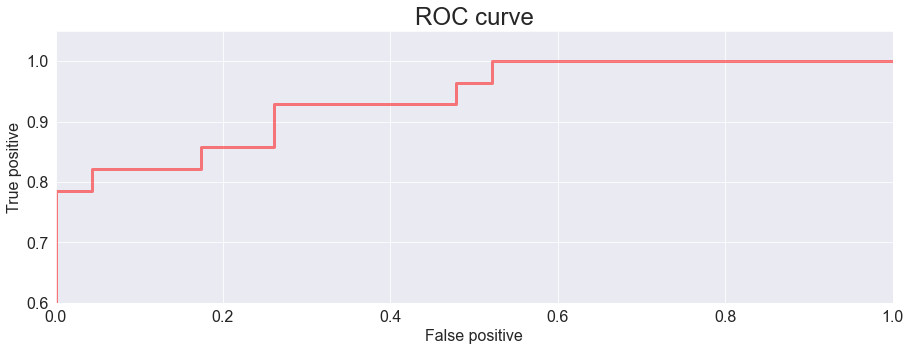

In [28]:
plt.figure(figsize=(15, 5))

plt.plot(fpr, tpr, color='red', lw=3, label='ROC curve (area = %0.3f)' % roc_auc, alpha=0.5)


plt.xlim([0.0, 1.0]) #настроим область отображения, размеры шрифта, подписи и тд
plt.ylim([0.6, 1.05])
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.grid(True)
plt.xlabel('False positive', fontsize=16)
plt.ylabel('True positive', fontsize=16)
plt.title('ROC curve', fontsize=24)
plt.show()

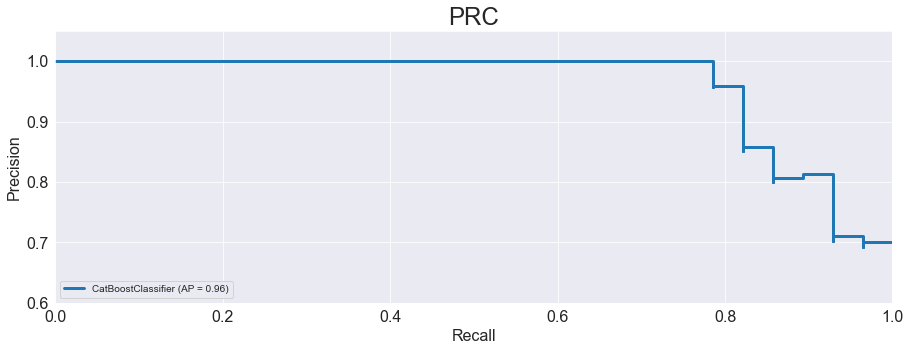

In [29]:
fig, ax = plt.subplots(figsize=(15, 5))


sklearn.metrics.plot_precision_recall_curve(model, X_test, y_test, ax=ax, lw = 3)

plt.xlim([0.0, 1.0])
plt.ylim([0.6, 1.05])
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.grid(True)
plt.xlabel('Recall', fontsize=16)
plt.ylabel('Precision', fontsize=16)
plt.title('PRC', fontsize=24)

plt.show()

In [30]:
s = sklearn.metrics.average_precision_score(pd.factorize(y_test)[0], model.predict_proba(X_test)[:,0]) #RPC AUC
print('RPC-AUC: ' + str(s))

RPC-AUC: 0.9213305046695979
